In [81]:
# %load_ext autoreload
# %autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import root_aux as raux
from scipy.ndimage import gaussian_filter
from scipy import ndimage

In [126]:
# simfile = "./simline320_270_76fib_8lay_n1e7_nowallpetCUT93_mask467_210mm_20thick_0_0_30_3.root"
# simfile = "./simline220_170_16fib_4lay_n1e7_nowallpet_mask31_70mm_20thick_0_0_20_3.root"
# simfile = "./simline320_270_76fib_8lay_n1e8_nowallpetCUT93_mask467_210mm_20thick_0_0_50_3.root"
# simfile = "./sim_PMMA130MeV_large1.root"
simfile = "./sim_PMMA130MeV_large2_cut_-20.root"
simdata, source = raux.get_histo(simfile, ["energyDeposits", "sourceHist"])
source_row = source.vals.reshape(-1)
sim_vals_row = simdata.vals.reshape(-1)

In [148]:
simfile1 = "./sim_PMMA130MeV_large3_cut_-20.root"
simdata1, source1 = raux.get_histo(simfile1, ["energyDeposits", "sourceHist"])
simfile2 = "./sim_PMMA130MeV_large4_cut_-20.root"
simdata2, source2 = raux.get_histo(simfile2, ["energyDeposits", "sourceHist"])
simfile3 = "./sim_PMMA130MeV_large4_cut_-20.root"
simdata3, source3 = raux.get_histo(simfile3, ["energyDeposits", "sourceHist"])
sim_vals_row = (simdata.vals+simdata1.vals+simdata2.vals+simdata3.vals).reshape(-1) 
# sim_vals_row /= sim_vals_row.sum()

In [4]:
matrixH =  raux.get_hmat("./matr320_270_76fib_8lay_n1e6_nowallpetCUT93_mask467_210mm_20thick_s105_100.root")
# matrixH =  raux.get_hmat("./matr220_170_n1e6_nowallpet_mask31_70mm_newAngles_pointSource.root")
# matrixH2 =  raux.get_hmat("../../build/matr320_270_76fib_n0p5e6_nowallpetCUT93_mask467_210mm_20thick_s105_100.root", norm=False)
# matrixH = matrixH + matrixH2
# matrixH = matrixH/matrixH.sum(axis=0)

In [149]:
# image = raux.reco_mlem(matrixH, sim_vals_row, 800, source=source_row)
# image = raux.reco_mlem(matrixH, sim_vals_row, 300, source=source_row, reco=image)
image2 = raux.reco_mlem_auto(matrixH, sim_vals_row, source_row)
# image = raux.reco_mlem(matrixH, sim_vals_row, 1000)

Reconstruction(autoiter):  69%|███████████████████████████████████████████████▎                     | 1372/2000 [01:42<00:46, 13.39it/s]

1371 iterations was performed
Best score: 0.01318


In [203]:
reco_row = image2[-1]
reco = reco_row.reshape(100,100)[:,:]/reco_row.sum()

In [204]:
mse, uqi, comb = raux.mse_uqi_set(image, source_row)

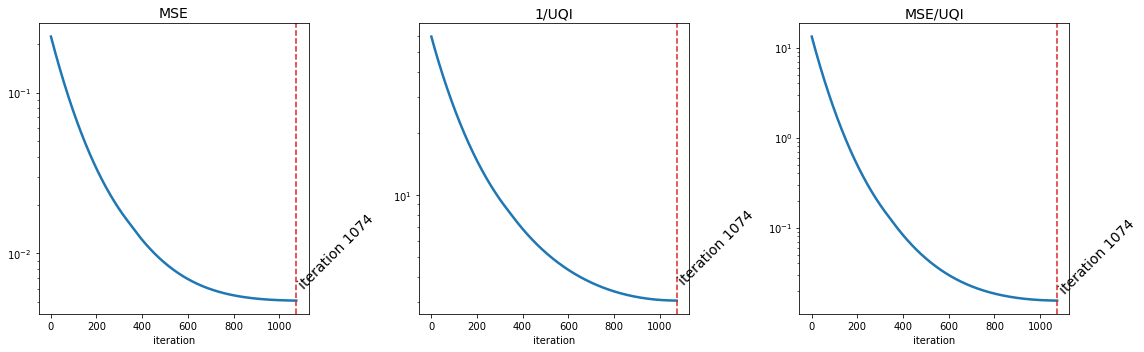

In [205]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(range(1,len(mse)), mse[1:], lw=2.5, label="$N_\gamma = 10^7$")
plt.axvline(x=np.argmin(mse), c="tab:red", ls="--")
plt.text(np.argmin(mse),1.2*mse[np.argmin(mse)],f'iteration {np.argmin(mse)}',rotation=45, size=14)
plt.yscale('log')
plt.xlabel("iteration")
plt.title("MSE", size=14)
plt.subplot(132)
plt.plot(range(1,len(mse)), uqi[1:], lw=2.5)
plt.axvline(x=np.argmin(uqi), c="tab:red", ls="--")
plt.text(np.argmin(uqi),1.2*uqi[np.argmin(uqi)],f'iteration {np.argmin(uqi)}',rotation=45, size=14)
plt.title("1/UQI", size=14)
# plt.ylim([1,2])
plt.yscale('log')
plt.xlabel("iteration")
plt.subplot(133)
plt.plot(range(1,len(mse)), comb[1:], lw=2.5)
plt.axvline(x=np.argmin(comb), c="tab:red", ls="--")
plt.text(np.argmin(comb),1.2*comb[np.argmin(comb)],f'iteration {np.argmin(comb)}',rotation=45, size=14)
plt.title("MSE/UQI", size=14)
plt.yscale('log')
plt.xlabel("iteration")
plt.tight_layout()
plt.savefig("uqi_800iter_"+simfile[2:-4]+"pdf", facecolor="white")
plt.show()

In [48]:
binWidth = 0.5*(source.edges.x[1]-source.edges.x[0])

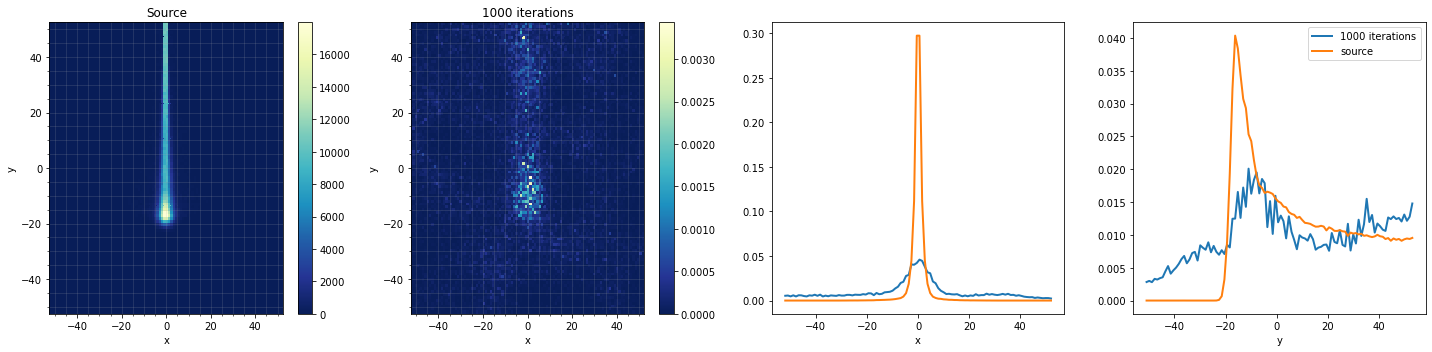

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.pcolor(source.edges.x, source.edges.y, source.vals.T, cmap="YlGnBu_r", rasterized=True)
plt.xlabel("x")
plt.ylabel("y")
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
# plt.title(f"Source $N_\gamma = 10^7$")
plt.title("Source")
plt.colorbar()
plt.subplot(142)
plt.pcolor(source.edges.x, source.edges.y, reco.T, cmap="YlGnBu_r", rasterized=True)
plt.xlabel("x")
plt.ylabel("y")
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
plt.title(f"{len(image)-1} iterations")
plt.colorbar()
plt.subplot(143)
plt.plot(source.edges.x[:-1] + binWidth, reco.T.sum(axis=0), label=f"{len(image)-1} iterations", lw=2)
plt.plot(source.edges.x[:-1] + binWidth, source.vals.T.sum(axis=0)/source.vals.T.sum(), label="source", lw=2)
plt.xlabel("x")
# plt.legend()
plt.subplot(144)
plt.plot(source.edges.y[:-1] + binWidth, reco.T.sum(axis=1), label=f"{len(image)-1} iterations", lw=2)
plt.plot(source.edges.y[:-1] + binWidth, source.vals.T.sum(axis=1)/source.vals.T.sum(), label="source", lw=2)
plt.xlabel("y")
plt.legend()
plt.tight_layout()
plt.savefig("histo_"+simfile[2:-4]+"pdf", facecolor="white")
# plt.savefig("histo_800iter_"+simfile[2:-4]+"pdf", facecolor="white")
plt.show()

In [ ]:
reco1=reco.copy()
reco1.T[:,np.where(source.edges.x<-20)]=0
reco1.T[:,np.where(source.edges.x[:-1]>20)]=0

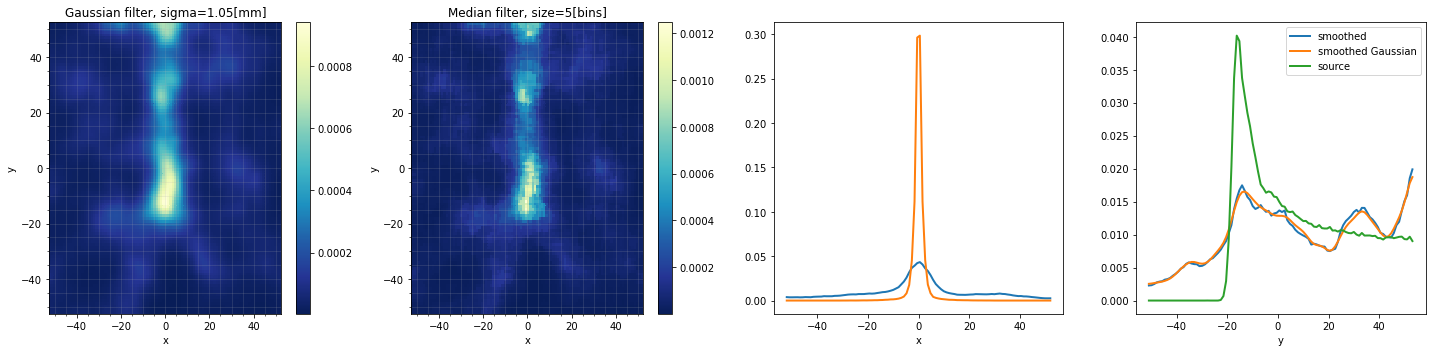

In [206]:
sig = 2
smoothedg = gaussian_filter(reco.T, sigma=sig)
smoothedg /= smoothedg.sum()
size = 5
smoothed = ndimage.median_filter(reco.T, size=size)
smoothed /= smoothed.sum()
# smoothed = ndimage.rank_filter(reco.T, rank=42, size=5)
plt.figure(figsize=(20,5))
plt.subplot(141)
# plt.pcolor(source.edges.x, source.edges.y, reco.T, cmap="YlGnBu_r", rasterized=True)
plt.pcolor(source.edges.x, source.edges.y, smoothedg, cmap="YlGnBu_r", rasterized=True)
plt.xlabel("x")
plt.ylabel("y")
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
# plt.title(f"{len(image)-1} iterations")
plt.title(f"Gaussian filter, sigma={round(sig*binWidth,2)}[mm]")
plt.colorbar()
plt.subplot(142)
plt.pcolor(source.edges.x, source.edges.y, smoothed, cmap="YlGnBu_r", rasterized=True)
plt.xlabel("x")
plt.ylabel("y")
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
plt.title(f"Median filter, size={size}[bins]")
plt.colorbar()
plt.subplot(143)
# plt.plot(source.edges.x[:-1] + binWidth, reco.T.sum(axis=0), label=f"{len(image)-1} iterations", lw=2)
plt.plot(source.edges.x[:-1] + binWidth, smoothed.sum(axis=0), label="smoothed", lw=2)
# plt.plot(source.edges.x[:-1] + binWidth, smoothedg.sum(axis=0), label="smoothed Gussian", lw=2)
plt.plot(source.edges.x[:-1] + binWidth, source.vals.T.sum(axis=0)/source.vals.T.sum(), label="source", lw=2)

plt.xlabel("x")
# plt.legend()
plt.subplot(144)
# plt.plot(source.edges.y[:-1] + binWidth, reco.T.sum(axis=1), label=f"{len(image)-1} iterations", lw=2)
plt.plot(source.edges.y[:-1] + binWidth, smoothed.sum(axis=1), label="smoothed", lw=2)
plt.plot(source.edges.y[:-1] + binWidth, smoothedg.sum(axis=1), label="smoothed Gaussian", lw=2)
plt.plot(source.edges.y[:-1] + binWidth, source.vals.T.sum(axis=1)/source.vals.T.sum(), label="source", lw=2)
plt.xlabel("y")
plt.legend()
plt.tight_layout()
plt.savefig("histo_"+simfile[2:-4]+"pdf", facecolor="white")
# plt.savefig("histo_800iter_"+simfile[2:-4]+"pdf", facecolor="white")
plt.show()